# Late Fusion Model - CMU-MOSI Dataset

In this notebook, we implement the Late Fusion Model, and test it on CMU-MOSI dataset.

In [1]:
# Clone the GitHub repository
!git clone https://github.com/rugvedmhatre/Multimodal-Sentiment-Analysis.git
%cd Multimodal-Sentiment-Analysis

fatal: destination path 'Multimodal-Sentiment-Analysis' already exists and is not an empty directory.
/content/Multimodal-Sentiment-Analysis


In [8]:
!pip install torch==1.12.1 torchvision==0.13.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.0+cpu
    Uninstalling torchvision-0.20.0+cpu:
      Successfully uninstalled torchvision-0.20.0+cpu


In [3]:

# Add project directory to Python path
import sys
sys.path.append('/content/Multimodal-Sentiment-Analysis')


## Importing Libraries

In [4]:
import os
import sys
import torch
import importlib

import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

## Importing Helper Functions

In [5]:
!ls /content/Multimodal-Sentiment-Analysis/notebooks/helpers


data  eval  fusions  objective_functions  robustness  training	unimodals  utils


In [6]:
import sys
sys.path.append('/content/Multimodal-Sentiment-Analysis/notebooks')


In [10]:
!pip install memory-profiler


In [11]:
from helpers.data.get_data import get_dataloader
from helpers.unimodals.common_models import GRU, MLP
from helpers.training.supervised_learning import train, test
from helpers.fusions.common_fusions import Concat
from helpers.utils.common_utils import get_default_device, save_results

## Loading the Dataset

In [12]:
!gdown https://drive.google.com/u/0/uc?id=1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU

Downloading...
From (original): https://drive.google.com/u/0/uc?id=1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU
From (redirected): https://drive.google.com/uc?id=1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU&confirm=t&uuid=9e8ae654-9793-4fcf-965d-b366cd7d4633
To: /content/Multimodal-Sentiment-Analysis/mosi_raw.pkl
100% 357M/357M [00:01<00:00, 188MB/s]


In [13]:
traindata, validdata, testdata = get_dataloader(
    '/content/Multimodal-Sentiment-Analysis/mosi_raw.pkl', robust_test=False, data_type='mosi')

In [14]:
device = get_default_device()
print(device)

cpu


## Model Architecture

In [15]:
encoders = [GRU(35, 70, dropout=True, has_padding=True, batch_first=True).to(device),
            GRU(74, 200, dropout=True, has_padding=True, batch_first=True).to(device),
            GRU(300, 600, dropout=True, has_padding=True, batch_first=True).to(device)]
head = MLP(870, 870, 1).to(device)

In [16]:
fusion = Concat().to(device)

## Training

In [17]:
FILE_NAME = 'mosi_lf_r0'

In [19]:
train_losses, valid_losses = train(
    encoders, fusion, head, traindata, validdata, 100, task="regression", optimtype=torch.optim.AdamW,
    early_stop=False, is_packed=True, lr=1e-3, save=f'/content/drive/MyDrive/Btech project/saum_mmal/models/{FILE_NAME}.pt',
    weight_decay=0.01, objective=torch.nn.L1Loss()
)

Epoch [1/100]
Train Loss: 1.1887
Valid Loss: 1.0948
Saving Best

Epoch [2/100]
Train Loss: 0.9407
Valid Loss: 1.1807

Epoch [3/100]
Train Loss: 0.8914
Valid Loss: 1.0076
Saving Best

Epoch [4/100]
Train Loss: 0.7768
Valid Loss: 0.9703
Saving Best

Epoch [5/100]
Train Loss: 0.7531
Valid Loss: 0.9722

Epoch [6/100]
Train Loss: 0.6792
Valid Loss: 0.9705

Epoch [7/100]
Train Loss: 0.6311
Valid Loss: 0.9907

Epoch [8/100]
Train Loss: 0.5947
Valid Loss: 0.9438
Saving Best

Epoch [9/100]
Train Loss: 0.5433
Valid Loss: 0.9518

Epoch [10/100]
Train Loss: 0.5002
Valid Loss: 0.9743

Epoch [11/100]
Train Loss: 0.4820
Valid Loss: 0.9631

Epoch [12/100]
Train Loss: 0.4351
Valid Loss: 1.0006

Epoch [13/100]
Train Loss: 0.4105
Valid Loss: 0.9748

Epoch [14/100]
Train Loss: 0.4204
Valid Loss: 1.0510

Epoch [15/100]
Train Loss: 0.3823
Valid Loss: 1.0133

Epoch [16/100]
Train Loss: 0.3549
Valid Loss: 1.0079

Epoch [17/100]
Train Loss: 0.3194
Valid Loss: 0.9998

Epoch [18/100]
Train Loss: 0.3103
Valid Los

Text(0.5, 1.0, 'Loss vs. No. of epochs')

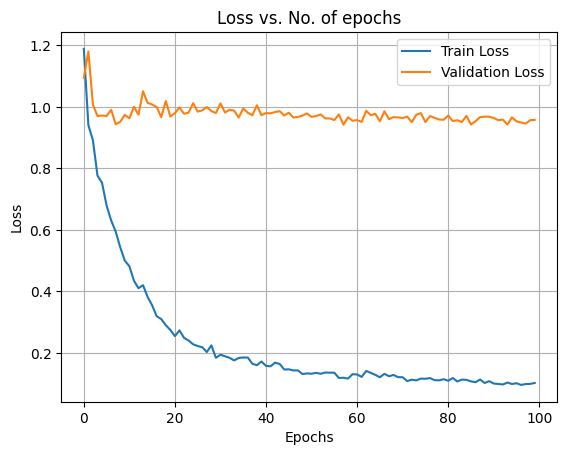

In [20]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [22]:
save_results(train_losses, valid_losses, f'/content/drive/MyDrive/Btech project/saum_mmal/results/{FILE_NAME}.pkl')

## Testing

In [24]:
model = torch.load(f'/content/drive/MyDrive/Btech project/saum_mmal/models/{FILE_NAME}.pt').to(device)

test(model, test_dataloaders_all=testdata, dataset='mosi', is_packed=True,
     criterion=torch.nn.L1Loss(), task="posneg-classification", no_robust=True)

Recall: 71.4939% | Total Accuracy: 71.2828%
Inference Time: 1s845ms
Inference Params: 2570311
